<a href="https://colab.research.google.com/github/mitalikhot/Data-Analysis-and-Web-Scraping-Integration/blob/main/Web_Scrapping_with_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Required Libraries

In [19]:
import requests
from bs4 import BeautifulSoup
import csv

#Extracting Data from a Website


In [20]:
BASE_URL = "http://quotes.toscrape.com/"
START_PAGE = "/page/1/"

def scrape_quotes():
  quotes_data = []
  next_page = START_PAGE
  visited_pages = set()

  while next_page:
    if next_page in visited_pages:
     print(f"Detected a loop at {next_page}, exiting...")
     break
    visited_pages.add(next_page)

    url = BASE_URL + next_page
    print(f"Scraping {url}")

    try:
      response = requests.get(url, timeout=5)
      response.raise_for_status()
    except requests.RequestException as e:
     print(f"Request failed for {url}: {e}")
     # Break the loop if the request fails to prevent infinite retries on a problematic page.
     break

    soup = BeautifulSoup(response.text, "html.parser")
    quotes = soup.find_all("div", class_="quote")

    if not quotes:
      print(f"No quotes found on {url}, exiting...")
      break

    for quote in quotes:
      try:
        text = quote.find("span", class_="text").get_text(strip=True)
        author = quote.find("small", class_="author").get_text(strip=True)
        tags = [tag.get_text(strip=True) for tag in quote.find_all("a", class_="tag")]
        quotes_data.append({
            "Quote": text,
            "Author": author,
            "Tags": ", ".join(tags)
        })
      except AttributeError as e:
        print(f"Error parsing quote on {url}: {e}")
        continue

    next_btn = soup.find("li", class_="next")
    next_page = next_btn.find("a")["href"] if next_btn else None

  return quotes_data

In [21]:
scraped_data = scrape_quotes()
display(scraped_data)

Scraping http://quotes.toscrape.com//page/1/
Scraping http://quotes.toscrape.com//page/2/
Scraping http://quotes.toscrape.com//page/3/
Scraping http://quotes.toscrape.com//page/4/
Scraping http://quotes.toscrape.com//page/5/
Scraping http://quotes.toscrape.com//page/6/
Scraping http://quotes.toscrape.com//page/7/
Scraping http://quotes.toscrape.com//page/8/
Scraping http://quotes.toscrape.com//page/9/
Scraping http://quotes.toscrape.com//page/10/


[{'Quote': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'Author': 'Albert Einstein',
  'Tags': 'change, deep-thoughts, thinking, world'},
 {'Quote': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'Author': 'J.K. Rowling',
  'Tags': 'abilities, choices'},
 {'Quote': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'Author': 'Albert Einstein',
  'Tags': 'inspirational, life, live, miracle, miracles'},
 {'Quote': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'Author': 'Jane Austen',
  'Tags': 'aliteracy, books, classic, humor'},
 {'Quote': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'Author': 'Marilyn Monroe',
  'Tags': 'be-yourself, inspirational'},

This code calls the `scrape_quotes()` function, stores the returned data in a variable named `scraped_data`, and then uses `display()` to show the first few entries of the scraped data.

#Storing Data into a CSV file

In [22]:
from typing_extensions import Writer
import csv
def save_to_csv(data, filename="quotes.csv"):
   if not data:
     print("No data to save.")
     return

   try:
    with open(filename, "w", newline="", encoding="utf-8") as f:
      writer = csv.DictWriter(f, fieldnames=["Quote", "Author", "Tags"])
      writer.writeheader()
      writer.writerows(data)
    print(f"Saved {len(data)} quotes to {filename}")
   except Exception as e:
    print(f"Error saving to {filename}: {e}")

if __name__ == "__main__":
  scraped_data = scrape_quotes()
  save_to_csv(scraped_data)

Scraping http://quotes.toscrape.com//page/1/
Scraping http://quotes.toscrape.com//page/2/
Scraping http://quotes.toscrape.com//page/3/
Scraping http://quotes.toscrape.com//page/4/
Scraping http://quotes.toscrape.com//page/5/
Scraping http://quotes.toscrape.com//page/6/
Scraping http://quotes.toscrape.com//page/7/
Scraping http://quotes.toscrape.com//page/8/
Scraping http://quotes.toscrape.com//page/9/
Scraping http://quotes.toscrape.com//page/10/
Saved 100 quotes to quotes.csv


#Performing Exploratory Data Analysis

In [23]:
import pandas as pd
file_path = '/content/quotes.csv'
df = pd.read_csv(file_path)
df.head()

,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


##Word Cloud Visualization

By generating a word cloud of the quotes to visualize the most frequently occurring words.


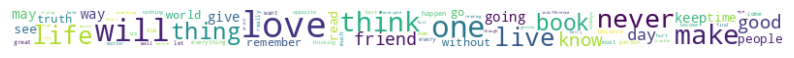

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_quotes = " ".join(df['Quote'].dropna())
wordcloud = WordCloud(width=800, height=40, background_color='white').generate(all_quotes)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Top 10 Most Quoted Authors

Visualization of author which have the highest number of quotes in the dataset.

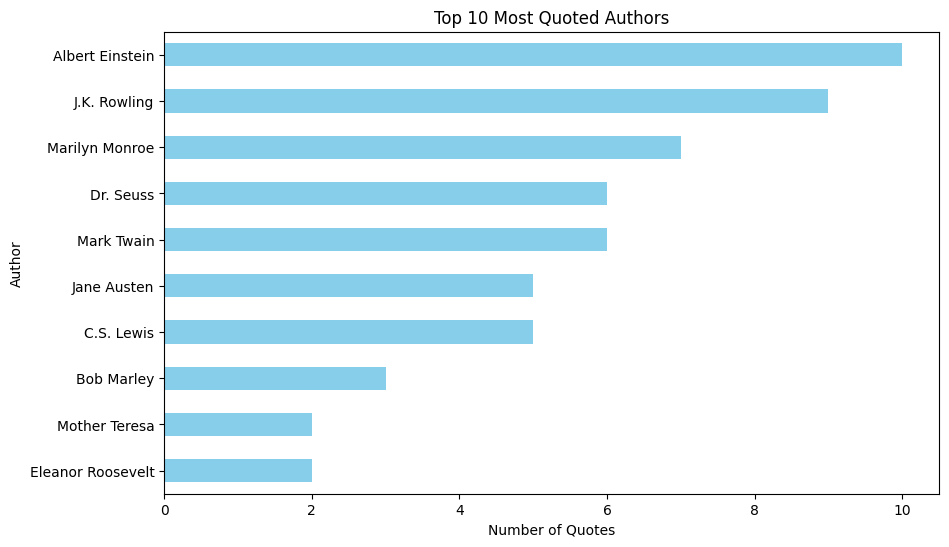

In [25]:
author_counts = df['Author'].value_counts()

plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Quoted Authors')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
plt.gca().invert_yaxis()
plt.show()

##Top 10 Most Common Tags

Splitting the comma separated tags and counting their frequencies to identify common themes.

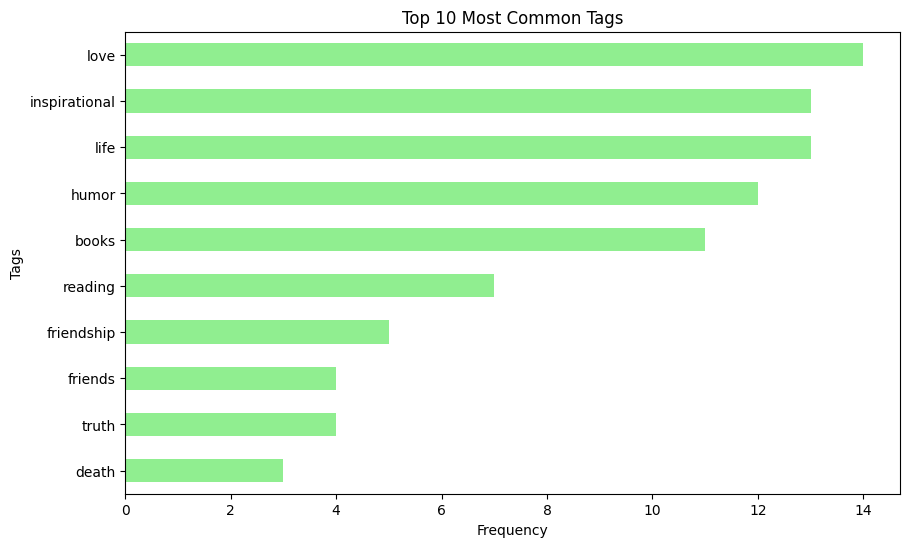

In [26]:
tag_counts = df['Tags'].str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
tag_counts.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.gca().invert_yaxis()
plt.show()

##Distribution of Quote Lengths

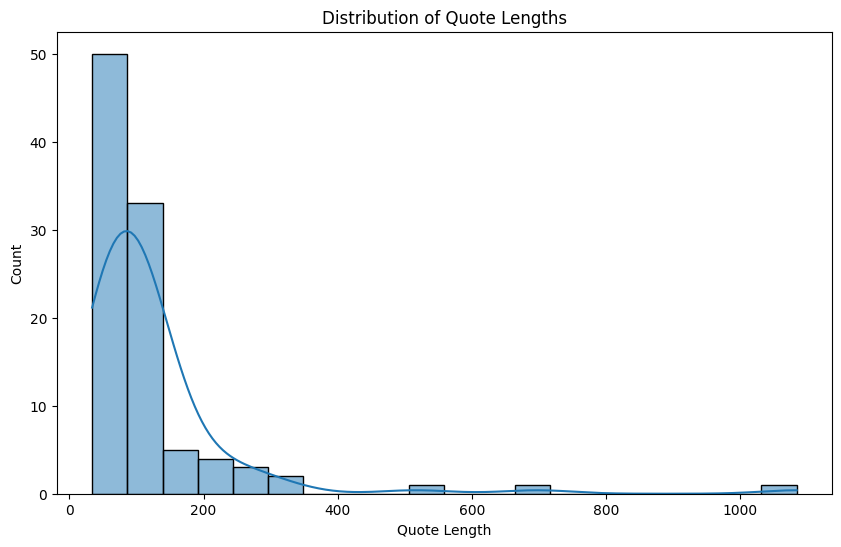

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Quote Length'] = df['Quote'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Quote Length'], bins=20, kde=True)
plt.title('Distribution of Quote Lengths')
plt.show()